la var de 128 est :  16075154911.178102
le seuil optimal est  177


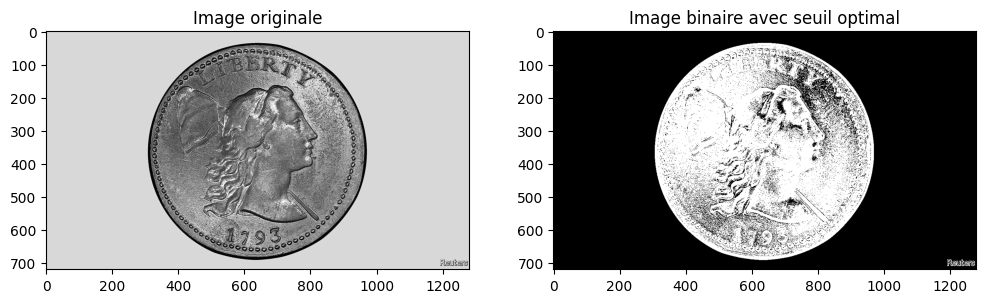

In [5]:
import numpy as np
from PIL import Image

class Otsu:
    def __init__(self, img):
        self.img = img
        self.get_pi()

    def get_pi(self):
        pi, _ = np.histogram(np.array(self.img).ravel(), 256, [0, 255])
        pi = pi.cumsum() / (self.img.shape[0] * self.img.shape[1])
        self.pi = pi

    def get_P1(self, k):
        return np.sum(self.pi[:k])

    def get_P2(self, k):
        return np.sum(self.pi[k:])  # la somme de k+1 à 255

    def get_m1(self, k, p1):
        if p1 <= 0:
            return 0
        m1 = 0
        for i in range(k):
            m1 += i * self.pi[i]
        m1 = m1 / p1
        return m1

    def get_m2(self, k, p2):
        if p2 <= 0:
            return 0
        m2 = 0
        for i in range(k, 256):  # 255
            m2 += i * self.pi[i]
        m2 = m2 / p2
        return m2

    def get_var(self, k):
        p1, p2 = self.get_P1(k), self.get_P2(k)
        m1, m2 = self.get_m1(k, p1), self.get_m2(k, p2)
        mg = p1 * m1 + p2 * m2
        var = p1 * (m1 - mg) ** 2 + p2 * (m2 - mg) ** 2
        return var

def method1(img, threshold):
    seg = []
    for row in img:
        r = []
        for l in row:
            if l < threshold:
                r.append(255)
            else:
                r.append(0)
        seg.append(r)
    seg = np.array(seg, dtype=np.uint8)
    return Image.fromarray(seg)

def method2(img, threshold1, threshold2):
    seg = []
    for row in img:
        r = []
        for l in row:
            if l > threshold2 and l < threshold1:
                r.append(255)
            else:
                r.append(0)
        seg.append(r)
    seg = np.array(seg, dtype=np.uint8)
    return Image.fromarray(seg)

img = np.array(Image.open('/Users/chawkibhd/Desktop/dataset/1/coins_images/coins_images/all_coins/1a1db517f0.jpg').convert('L'))
method3 = Otsu(img)
print("la var de 128 est : ", method3.get_var(128))

varTable = []
for k in range(0, 256):
    varTable.append(method3.get_var(k))

bestThr = np.argmax(varTable)
print("le seuil optimal est ", bestThr)

image_segmanter =method1(img, bestThr)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.title('Image originale')
plt.imshow(img, cmap='gray')

plt.subplot(1, 2, 2)
plt.title('Image binaire avec seuil optimal')
plt.imshow(image_segmanter, cmap='gray')
plt.show()


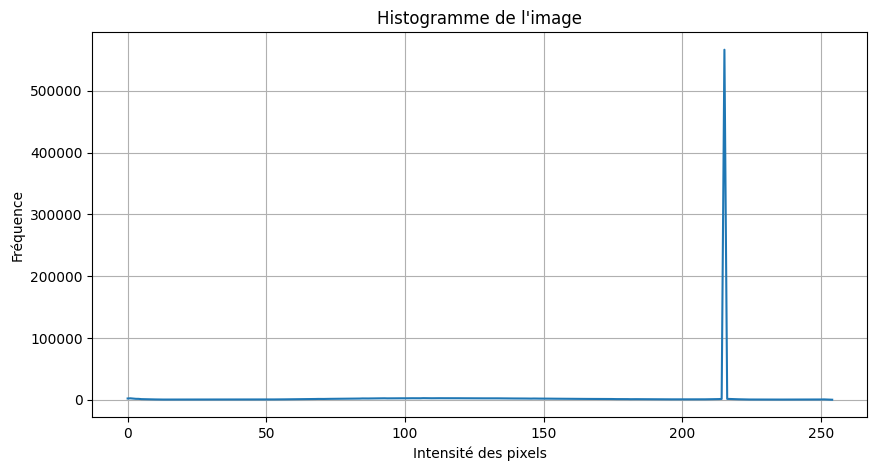

Seuil optimal trouvé par la méthode d'Otsu : 155


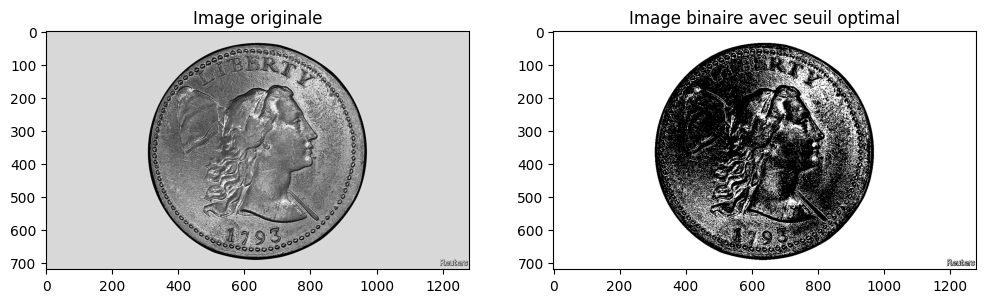

In [2]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

def otsu_threshold(image_array):
    """Applique la méthode d'Otsu pour trouver un seuil optimal."""
    hist, bin_edges = np.histogram(image_array, bins=256, range=(0, 255))
    
    plt.figure(figsize=(10, 5))
    plt.plot(bin_edges[0:-1], hist)  
    plt.title("Histogramme de l'image")
    plt.xlabel("Intensité des pixels")
    plt.ylabel("Fréquence")
    plt.grid(True)
    plt.show()
    
    prob = hist / np.sum(hist)
    
    max_variance = 0
    optimal_threshold = 0
    
    for t in range(256):
        w0 = np.sum(prob[:t])
        w1 = np.sum(prob[t:])
        
        if w0 == 0 or w1 == 0:
            continue
        mu0 = np.sum(np.arange(0, t) * prob[:t]) / w0
        mu1 = np.sum(np.arange(t, 256) * prob[t:]) / w1
        
        variance = w0 * w1 * (mu0 - mu1) ** 2
        
        # Trouver le seuil qui maximise la variance inter-classes
        if variance > max_variance:
            max_variance = variance
            optimal_threshold = t
    
    return optimal_threshold

def test_image(image_path):
    # Charger l'image
    image = Image.open(image_path)
    
    # Convertir l'image en niveaux de gris pour appliquer Otsu
    image_gray = image.convert('L')
    image_array = np.array(image_gray)

    # Trouver le seuil optimal avec Otsu
    optimal_threshold = otsu_threshold(image_array)
    print(f"Seuil optimal trouvé par la méthode d'Otsu : {optimal_threshold}")

    # Appliquer le seuillage binaire avec le seuil optimal
    binary_image_array = (image_array > optimal_threshold) * 255

    # Convertir le tableau binaire en image
    binary_image = Image.fromarray(np.uint8(binary_image_array))

    # Afficher l'image originale et l'image binaire
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.title('Image originale')
    plt.imshow(image_array, cmap='gray')

    plt.subplot(1, 2, 2)
    plt.title('Image binaire avec seuil optimal')
    plt.imshow(binary_image_array, cmap='gray')

    plt.show()

# Remplacez 'votre_image.jpg' par le chemin de votre image
test_image('/Users/chawkibhd/Desktop/dataset/1/coins_images/coins_images/all_coins/1a1db517f0.jpg')


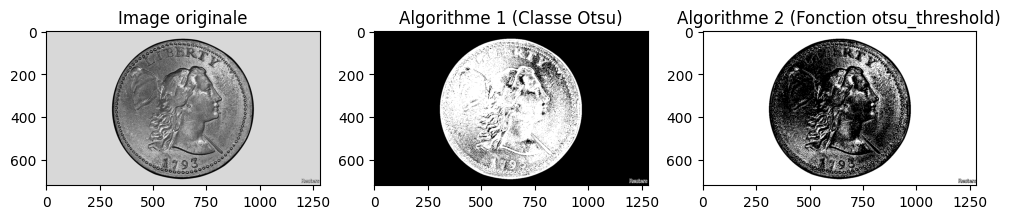

In [8]:
# Test de l'algorithme 1 (Classe Otsu)
img = np.array(Image.open('/Users/chawkibhd/Desktop/dataset/1/coins_images/coins_images/all_coins/1a1db517f0.jpg').convert('L'))
otsu_method_1 = Otsu(img)
best_threshold_1 = np.argmax([otsu_method_1.get_var(k) for k in range(256)])

segmented_image_1 = method1(img, best_threshold_1)

# Test de l'algorithme 2 (Fonction otsu_threshold)
def otsu_threshold(image_array):
    hist, bin_edges = np.histogram(image_array, bins=256, range=(0, 255))
    prob = hist / np.sum(hist)
    max_variance = 0
    optimal_threshold = 0
    
    for t in range(256):
        w0 = np.sum(prob[:t])
        w1 = np.sum(prob[t:])
        if w0 == 0 or w1 == 0:
            continue
        mu0 = np.sum(np.arange(0, t) * prob[:t]) / w0
        mu1 = np.sum(np.arange(t, 256) * prob[t:]) / w1
        variance = w0 * w1 * (mu0 - mu1) ** 2
        if variance > max_variance:
            max_variance = variance
            optimal_threshold = t
    
    return optimal_threshold

optimal_threshold_2 = otsu_threshold(img)
binary_image_array_2 = (img > optimal_threshold_2) * 255
segmented_image_2 = Image.fromarray(np.uint8(binary_image_array_2))

# Affichage des résultats pour comparaison
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.title('Image originale')
plt.imshow(img, cmap='gray')

plt.subplot(1, 3, 2)
plt.title('Algorithme 1 (Classe Otsu)')
plt.imshow(segmented_image_1, cmap='gray')

plt.subplot(1, 3, 3)
plt.title('Algorithme 2 (Fonction otsu_threshold)')
plt.imshow(segmented_image_2, cmap='gray')

plt.show()
